# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [3]:
# Load the dataset
data = pd.read_csv('GermanCredit.csv.zip')

# Examine data
data.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Duration                                1000 non-null   int64 
 1   Amount                                  1000 non-null   int64 
 2   InstallmentRatePercentage               1000 non-null   int64 
 3   ResidenceDuration                       1000 non-null   int64 
 4   Age                                     1000 non-null   int64 
 5   NumberExistingCredits                   1000 non-null   int64 
 6   NumberPeopleMaintenance                 1000 non-null   int64 
 7   Telephone                               1000 non-null   int64 
 8   ForeignWorker                           1000 non-null   int64 
 9   Class                                   1000 non-null   object
 10  CheckingAccountStatus.lt.0              1000 non-null   int64 
 11  Check

In [4]:
# We have 1000 data points with no null values. Class is the target variable.

In [5]:
# Encode the labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])

data.head() #Label encoding: 1 is good, 0 is bad

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,1,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,0,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,1,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,1,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,0,...,0,0,1,0,0,1,0,0,1,0


In [6]:
# Separate target variable from input features
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the decision tree classifier object and fit it to the training data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate performance
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Store accuracy performance for later comparison
results = []
results.append({'Classifier': "Decision Tree", 'Accuracy': accuracy_score(y_test, y_pred)})


Accuracy: 0.6766666666666666
Confusion Matrix:
 [[ 47  44]
 [ 53 156]]
              precision    recall  f1-score   support

           0       0.47      0.52      0.49        91
           1       0.78      0.75      0.76       209

    accuracy                           0.68       300
   macro avg       0.62      0.63      0.63       300
weighted avg       0.69      0.68      0.68       300



### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [8]:
! pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.5/90.5 KB 3.4 MB/s eta 0:00:00


In [9]:
try:
    
    from dtreeviz.trees import dtreeviz

    viz = dtreeviz(clf,
                   X_test,
                   y_test,
                   target_name='target',
                   #feature_names=iris.feature_names,
                   #class_names=list(iris.target_names,)
                  )
    viz.save('decision_tree.svg')
except ImportError:
    pass


## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
# Create the random forest classifier object and fit it to the training data
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Make predictions
y_pred = rfc.predict(X_test)

# Evaluate performance
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Store accuracy performance for later comparison
results.append({'Classifier': "Random Forest", 'Accuracy': accuracy_score(y_test, y_pred)})

Accuracy: 0.7633333333333333
Confusion Matrix:
 [[ 37  54]
 [ 17 192]]
              precision    recall  f1-score   support

           0       0.69      0.41      0.51        91
           1       0.78      0.92      0.84       209

    accuracy                           0.76       300
   macro avg       0.73      0.66      0.68       300
weighted avg       0.75      0.76      0.74       300



As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

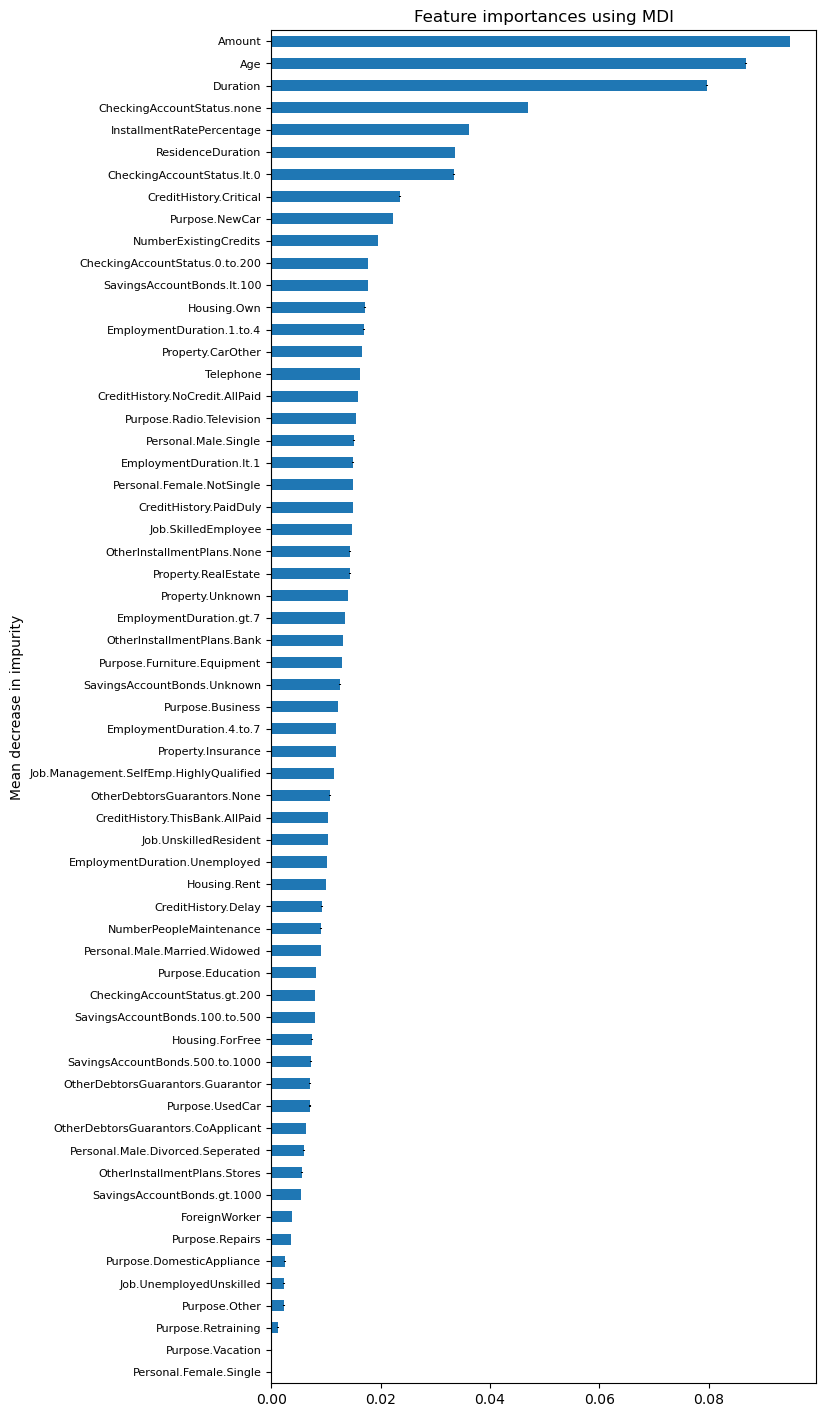

In [10]:
# Feature importance based on mean decrease in impurity
import numpy as np
from matplotlib import pyplot as plt

# Get feature names from X
feature_names = list(X.columns)

# Get feature importances from trained classifier
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

# Plot the feature importances
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=True)

fig, ax = plt.subplots()
forest_importances.plot.barh(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.yticks(fontsize=8)
fig.tight_layout()
fig.set_size_inches(10, 16)
plt.show()

A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [13]:
! pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.0/34.0 MB 41.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=ac9da6ef5e66f1642bd96feab62e5f7ecc8f4a7757b84843d4973b9552d00e84
  Stored in directory: /root/.cache/pip/wheels/35/fb/ef/a08dd2a1611435285fa3f9d9104bf554f10c2eb7293b526ccb
  Created wheel for matplotlib: filename=matplotlib-3.1.1-cp38-cp38-linux_x86_64.whl size=12090045 sha256=5e5e99a4e6bf0f9502d9018639ce3c02b1ffd471a5f532fcc3fc5d1c53843c2a
  Stored in directory: /root/.cache/pip/wheels/85/86/f1/054e7477b5e68f3c4a1258d12ae1c2205d6889283ce631dfe5
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=

While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

Pick a few features, and make a couple of Partial Dependence Plots.

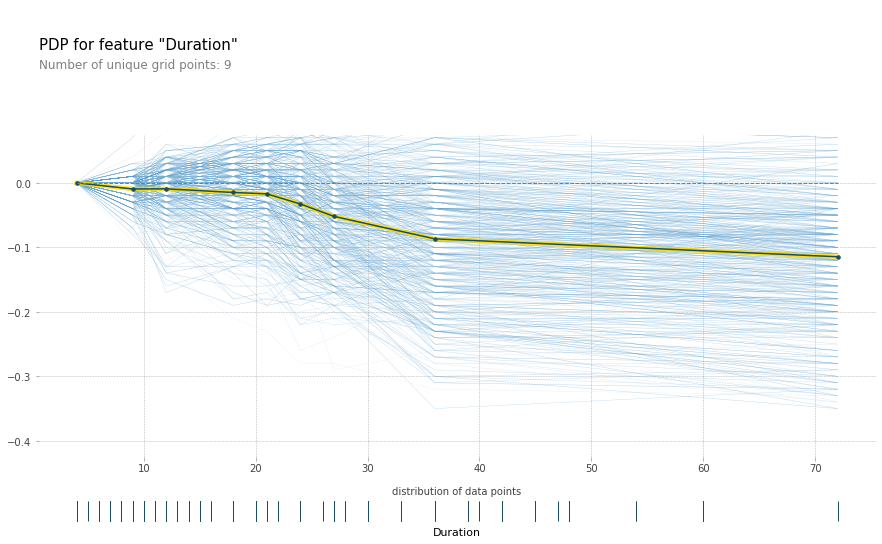

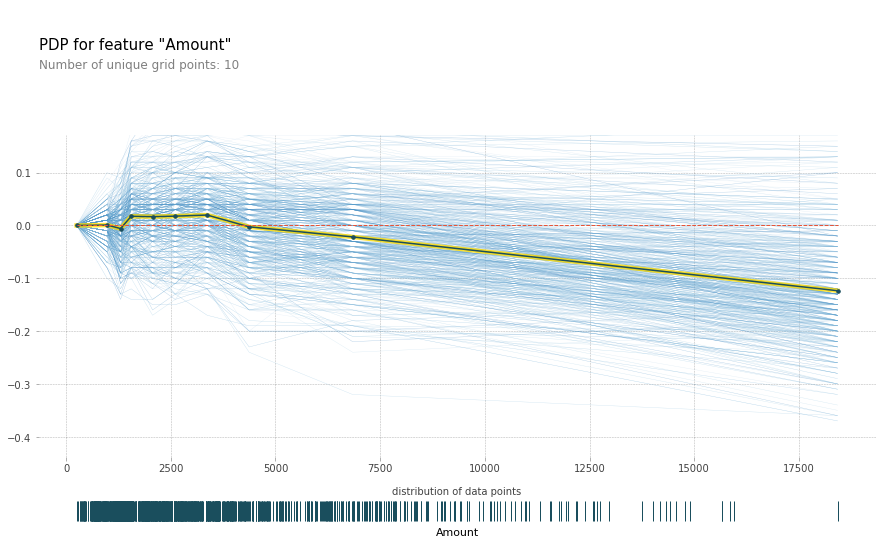

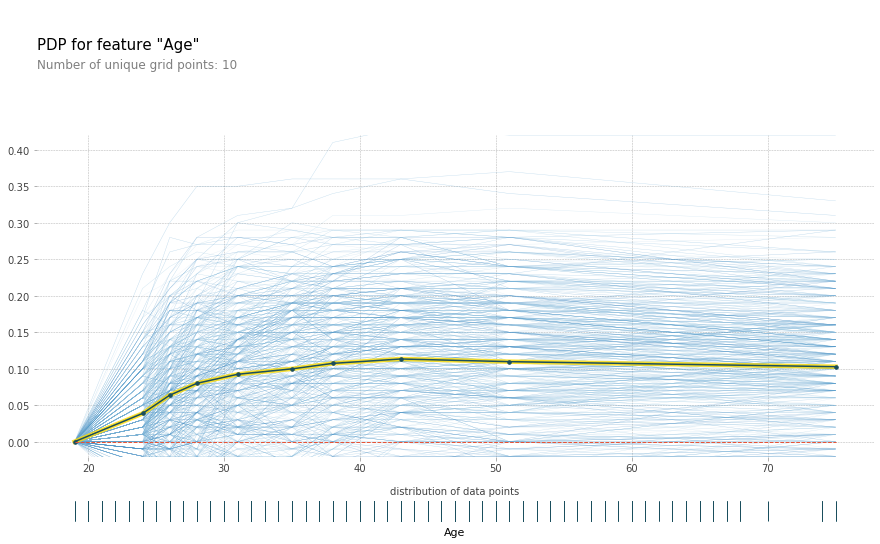

In [15]:
from pdpbox import pdp, get_dataset, info_plots
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Select a few features for PDPs
p_features = ["Duration", "Amount", "Age"]

# Create a PDP plot for each feature
for feature in p_features:
    # create a PDP data set
    pdp_data = pdp.pdp_isolate(model=rfc, dataset=X, model_features=X.columns, feature=feature)

    # plot the PDP
    fig, axes = pdp.pdp_plot(pdp_data, feature, plot_lines=True, frac_to_plot=0.5, plot_pts_dist=True)
    plt.show()

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [ ]:
! conda install -y -c anaconda py-xgboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.1.0



## Package Plan ##

  environment location: /Users/eddiechu/miniconda3/envs/bootcamp

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          13 KB  anaconda
    ca-certificates-2022.4.26  |       hca03da5_0         127 KB  anaconda
    certifi-2022.6.15          |   py38hca03da5_0         157 KB  anaconda
    joblib-1.1.0               |     pyhd3eb1b0_0         211 KB  anaconda
    libxgboost-1.5.0           |       hc377ac9_1         2.0 MB  anaconda
    openssl-1.1.1t             |    

scikit-learn-1.0.2   | 6.9 MB    | ####2                                 |  12% 






scipy-1.7.3          | 19.2 MB   | #########9                            |  27% 








scikit-learn-1.0.2   | 6.9 MB    | ############8                         |  35% 







openssl-1.1.1t       | 2.6 MB    | 8                                     |   2% 





libxgboost-1.5.0     | 2.0 MB    | ##################################### | 100% 





libxgboost-1.5.0     | 2.0 MB    | ##################################### | 100% 








scikit-learn-1.0.2   | 6.9 MB    | ###############9                      |  43% 






scipy-1.7.3          | 19.2 MB   | ############1                         |  33% 







openssl-1.1.1t       | 2.6 MB    | #3                                    |   4% 








scikit-learn-1.0.2   | 6.9 MB    | ##################4                   |  50% 






scipy-1.7.3          | 19.2 MB   | #############9                        |  38% 








scikit-learn-1.0.2   | 6.9 MB    | 

In [ ]:
! conda install -y -c conda-forge catboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.1.0



## Package Plan ##

  environment location: /Users/eddiechu/miniconda3/envs/bootcamp

  added / updated specs:
    - catboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boost-cpp-1.74.0           |       h32e41df_4        15.5 MB  conda-forge
    cairo-1.16.0               |       h29d4eff_2         941 KB
    catboost-1.0.6             |   py38hca03da5_1        14.0 MB
    contourpy-1.0.5            |   py38h525c30c_0         182 KB
    cycler-0.11.0              |     pyhd8ed1ab_0          10 KB  conda-forge
    expat-2.5.0                |       hb7217d7_0         152 

freetype-2.10.4      | 874 KB    |                                       |   0% 








libwebp-1.2.4        | 84 KB     |                                       |   0% 









pillow-9.4.0         | 671 KB    |                                       |   0% 










gdk-pixbuf-2.42.8    | 583 KB    |                                       |   0% 











harfbuzz-4.3.0       | 1005 KB   |                                       |   0% 












lcms2-2.14           | 227 KB    |                                       |   0% 













jpeg-9e              | 213 KB    |                                       |   0% 














python-graphviz-0.20 | 35 KB     |                                       |   0% 















pcre-8.45            | 230 KB    |                                       |   0% 
















cycler-0.11.0        | 10 KB     |                                       |   0% 

















importlib_resources- | 30 KB     |                               

librsvg-2.54.4       | 4.3 MB    | ###8                                  |  11% 









pillow-9.4.0         | 671 KB    | ####4                                 |  12% 










gdk-pixbuf-2.42.8    | 583 KB    | #####                                 |  14% 












lcms2-2.14           | 227 KB    | ##########################            |  70% 









pillow-9.4.0         | 671 KB    | #######                               |  19% 






librsvg-2.54.4       | 4.3 MB    | ######                                |  16% 










gdk-pixbuf-2.42.8    | 583 KB    | ########1                             |  22% 












lcms2-2.14           | 227 KB    | ##################################### | 100% 












lcms2-2.14           | 227 KB    | ##################################### | 100% 











harfbuzz-4.3.0       | 1005 KB   | 5                                     |   2% 






librsvg-2.54.4       | 4.3 MB    | #######7                              |  21% 










gd

libwebp-base-1.2.4   | 316 KB    | ##################################### | 100% 











harfbuzz-4.3.0       | 1005 KB   | #####################2                |  57% 



















expat-2.5.0          | 152 KB    | #######################3              |  63% 





















gts-0.7.6            | 287 KB    | ##                                    |   6% 




















libtool-2.4.7        | 399 KB    | ##################################### | 100% 




















libtool-2.4.7        | 399 KB    | ##################################### | 100% 











harfbuzz-4.3.0       | 1005 KB   | ##########################5           |  72% 






















 ... (more hidden) ...





















gts-0.7.6            | 287 KB    | ##########2                           |  28% 






















 ... (more hidden) ...



















expat-2.5.0          | 152 KB    | ###################################   |  95% 











harfbuzz-4.3.0       | 1005 

In [ ]:
! conda install -y -c conda-forge lightgbm

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.1.0



## Package Plan ##

  environment location: /Users/eddiechu/miniconda3/envs/bootcamp

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    lightgbm-3.2.1             |   py38h6f2b01f_0         1.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.0 MB

The followi

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

In [11]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBClassifier

# Create the xgboost classifier object and fit it to the training data
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

# Make predictions
y_pred = xgbc.predict(X_test)

# Evaluate performance

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Store accuracy performance for later comparison
results.append({'Classifier': "XG Boost", 'Accuracy': accuracy_score(y_test, y_pred)})

[02:41:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.7733333333333333
Confusion Matrix:
 [[ 44  47]
 [ 21 188]]
              precision    recall  f1-score   support

           0       0.68      0.48      0.56        91
           1       0.80      0.90      0.85       209

    accuracy                           0.77       300
   macro avg       0.74      0.69      0.71       300
weighted avg       0.76      0.77      0.76       300



In [12]:
from catboost import CatBoostClassifier

# Suppress warnings
warnings.filterwarnings('ignore')

# Create the catboost classifier object and fit it to the training data
cbc = CatBoostClassifier(verbose=False)
cbc.fit(X_train, y_train)

# Make predictions
y_pred = cbc.predict(X_test)

# Evaluate performance

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Store accuracy performance for later comparison
results.append({'Classifier': "CatBoost", 'Accuracy': accuracy_score(y_test, y_pred)})

Accuracy: 0.79
Confusion Matrix:
 [[ 42  49]
 [ 14 195]]
              precision    recall  f1-score   support

           0       0.75      0.46      0.57        91
           1       0.80      0.93      0.86       209

    accuracy                           0.79       300
   macro avg       0.77      0.70      0.72       300
weighted avg       0.78      0.79      0.77       300



In [13]:
from lightgbm import LGBMClassifier

# Create the lightgbm classifier object and fit it to the training data
lgbmc = LGBMClassifier()
lgbmc.fit(X_train, y_train)

# Make predictions
y_pred = lgbmc.predict(X_test)

# Evaluate performance

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Store accuracy performance for later comparison
results.append({'Classifier': "LightGBM", 'Accuracy': accuracy_score(y_test, y_pred)})

Accuracy: 0.7966666666666666
Confusion Matrix:
 [[ 49  42]
 [ 19 190]]
              precision    recall  f1-score   support

           0       0.72      0.54      0.62        91
           1       0.82      0.91      0.86       209

    accuracy                           0.80       300
   macro avg       0.77      0.72      0.74       300
weighted avg       0.79      0.80      0.79       300



In [14]:
# Create a DataFrame to display the results
df = pd.DataFrame(results)
print(df)

      Classifier  Accuracy
0  Decision Tree  0.676667
1  Random Forest  0.763333
2       XG Boost  0.773333
3       CatBoost  0.790000
4       LightGBM  0.796667
